
# Der Iris Datensatz
Dieser Datensatz besteht aus 3 verschiedenen Arten von Schwertlilien
(Setosa, Versicolour und Virginica), Blütenblatt- und Kelchblatt
Länge, gespeichert in einem 150x4 numpy.ndarray

Die Zeilen sind die Proben und die Spalten sind:
Kelchblattlänge, Kelchblattbreite, Blütenblattlänge und Blütenblattbreite.

Die folgende Darstellung verwendet die ersten beiden Merkmale.

[Hier](https://en.wikipedia.org/wiki/Iris_flower_data_set) können Sie mehr über diesen Datensatz erfahren.


In [3]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

## Den Datensatz laden



In [4]:
from sklearn import datasets
# Scikit-learn, sklearn, (ehemals scikits.learn) ist eine freie Software-Bibliothek zum maschinellen Lernen für die Programmiersprache Python

iris = datasets.load_iris()

## Punktwolke für den Iris-Datensatz

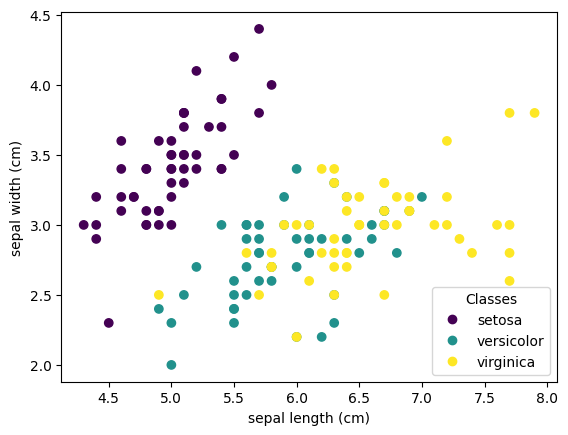

In [5]:
import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

Jeder Punkt im Streudiagramm bezieht sich auf eine der 150 Irisblüten im Datensatz, wobei die Farbe den jeweiligen Typ angibt (Setosa, Versicolour und Virginica). Man kann bereits ein Muster des Setosa-Typs erkennen, der aufgrund seines kurzen und breiten Kelchblattes leicht identifizierbar ist. Betrachtet man nur die beiden Dimensionen Kelchblattbreite und -länge, so gibt es immer noch Überschneidungen zwischen den Typen Versicolor und Virginica.


## Eine PCA des Iris-Datensatzes plotten

Wenden wir eine Hauptkomponentenanalyse (PCA) auf den Iris-Datensatz an
und stellen dann die Iris über die ersten drei PCA-Dimensionen dar.
So können wir besser zwischen den drei Typen unterscheiden!



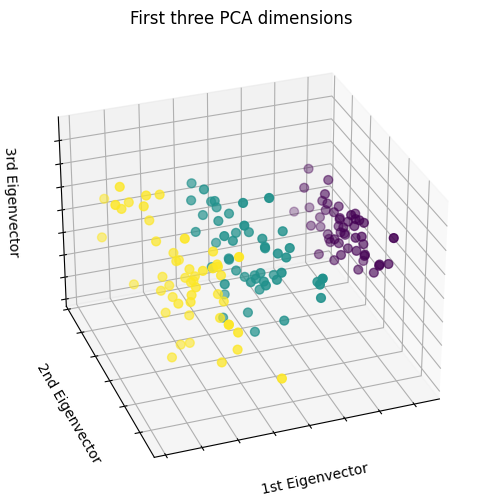

In [6]:
# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn.decomposition import PCA
# https://medium.com/data-science-365/principal-component-analysis-pca-with-scikit-learn-1e84a0c731b0

# plotten, Diagrammgrösse festlegen
fig = plt.figure(1, figsize=(8, 6))

ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=iris.target,
    s=40,
)

ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()

Die PCA erzeugt 3 neue Merkmale, die eine lineare Kombination der
4 ursprünglichen Merkmale sind. Darüber hinaus maximiert diese Transformation die Varianz.
Mit dieser Transformation können wir jede Art nur anhand des ersten Merkmals
nur anhand des ersten Merkmals (d. h. der ersten Eigenwerte).



## Python-Kurs 
[Maschinelles Lernen in Python](https://www.python-kurs.eu/maschinelles_lernen_daten_visualisierung.php)

### Was ist der Datentyp des Iris-Datensatzes?

In [7]:
type(iris)

sklearn.utils._bunch.Bunch

### Was sind Bunch-Objekte?
[Dokumentation](https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html#:~:text=Bunch%20objects%20are%20sometimes%20used,value_key%20.&text=Create%20a%20new%20dictionary%20with,and%20values%20set%20to%20value.)

Im Moment reicht es, wenn wir wissen, dass wir Dictionary-Methoden verwenden können, um auf Bunch-Inhalte zugreifen zu können. So können wir uns beispielsweise alle Schlüssel von iris ausgeben lassen:

In [8]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [9]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


Wir können die Anzahl Stichproben (150) und Features (Breite und Länge der Kron- und Kelchblätter, i.e. 4) anzeigen lassen.

In [10]:
print(iris.data.shape)

(150, 4)


In [11]:
print(iris.data.shape)
print(iris.target.shape)

(150, 4)
(150,)


In [12]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [13]:
import numpy as np
np.bincount(iris.target)

array([50, 50, 50])

Mit der Bincount-Funktion von NumPy können wir sehen, dass die Klassen in diesem Datensatz *gleichmässig verteilt* sind - es gibt 50 Blumen von jeder Art, wobei
* class 0: Iris-Setosa
* class 1: Iris-Versicolor
* class 2: Iris-Virginica

Diese Klassen-Namen werden im letzten Attribut gespeichert, `target_names`

In [14]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


Bei den Daten in scikit-learn kann man mit wenigen Ausnahmen davon ausgehen, dass sie als zwei-dimensionale Arrays abgespeichert sind. Ihre Gestalt (shape) ist von der Form "(n_samples, n_features)".

n_samples: Die Anzahl der Samples: Jedes Sample ist ein zu verarbeitendes Objekt. Eine Stichprobe kann ein Dokument, ein Bild, ein Ton, ein Video oder ein astronomisches Objekt sein, Eine Stichprobe entspricht einer Zeile in einer Datenbank oder CSV-Datei, oder was auch immer man mit einem festen Satz von quantitativen Merkmalen beschreiben können.
n_features: Die Anzahl der Merkmale oder besonderen Merkmale, die zur Beschreibung der einzelnen Merkmale verwendet werden können Artikel in quantitativer Weise. Features sind im Allgemeinen reelle Werte, können aber auch boolesche Werte oder Werte sein in einigen Fällen diskret bewertet.

Die Anzahl der Features muss im Voraus festgelegt werden. Es kann jedoch sehr hoch dimensioniert sein (z.B. Millionen von Merkmalen), wobei die meisten von ihnen "Null" für eine gegebene Stichprobe sein können. Das ist ein Fall wo scipy.sparse Matrizen nützlich sein können, sind sie viel speichereffizienter als NumPy-Arrays.

Wie wir uns aus dem vorherigen Abschnitt (oder dem Jupyter-Notizbuch) erinnern, stellen wir Beispiele (Datenpunkte oder Instanzen) als Zeilen im Datenarray dar und speichern die entsprechenden Features, die "Dimensionen", als Spalten.

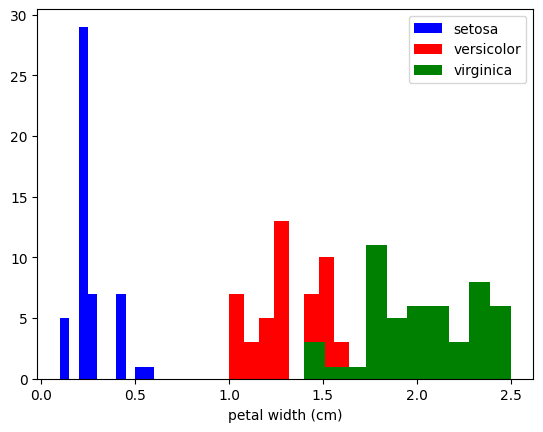

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
x_index = 3
colors = ['blue', 'red', 'green']

for label, color in zip(range(len(iris.target_names)), colors):
    ax.hist(iris.data[iris.target==label, x_index], 
            label=iris.target_names[label],
            color=color)

ax.set_xlabel(iris.feature_names[x_index])
ax.legend(loc='upper right')
fig.show()

### Übung
Im obigen Code haben wir x_index auf 3 gesetzt, das bedeutet, dass wir uns das Histogramm der Breite der Kronblätter (petals) erzeugt haben. Schauen Sie sich entsprechend die Histogramme der anderen Größen von den Kelch- (sepals) und Kronblättern an.

### Streudiagramm mit zwei Merkmalen
Das nächste Diagramm zeigt zwei Merkmale in einem Diagramm:

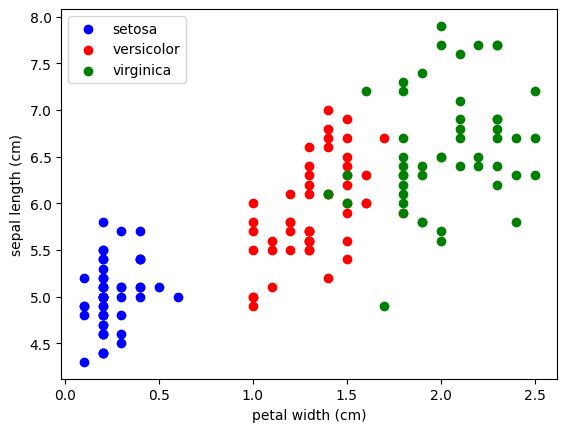

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

x_index = 3
y_index = 0

colors = ['blue', 'red', 'green']

for label, color in zip(range(len(iris.target_names)), colors):
    ax.scatter(iris.data[iris.target==label, x_index], 
                iris.data[iris.target==label, y_index],
                label=iris.target_names[label],
                c=color)

ax.set_xlabel(iris.feature_names[x_index])
ax.set_ylabel(iris.feature_names[y_index])
ax.legend(loc='upper left')
plt.show()

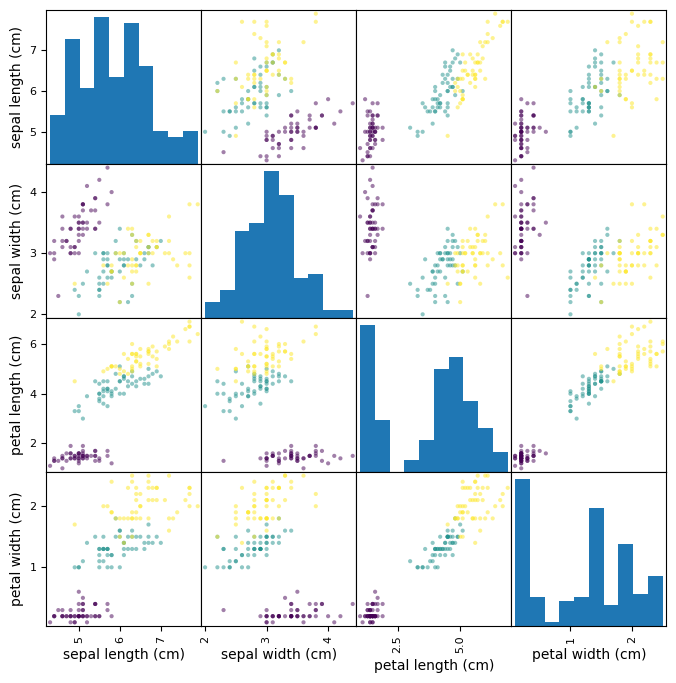

In [19]:
import pandas as pd
    
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
pd.plotting.scatter_matrix(iris_df, 
                           c=iris.target, 
                           figsize=(8, 8)
                          );

### 3-Dimensionale Visualisierung

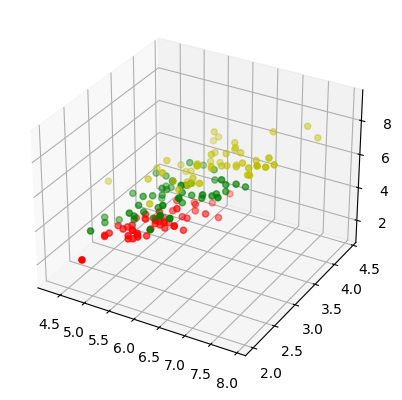

In [20]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from mpl_toolkits.mplot3d import Axes3D
iris = load_iris()
X = []
for iclass in range(3):
    X.append([[], [], []])
    for i in range(len(iris.data)):
        if iris.target[i] == iclass:
            X[iclass][0].append(iris.data[i][0])
            X[iclass][1].append(iris.data[i][1])
            X[iclass][2].append(sum(iris.data[i][2:]))

colours = ("r", "g", "y")
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for iclass in range(3):
    ax.scatter(X[iclass][0], X[iclass][1], X[iclass][2], c=colours[iclass])
plt.show()

### Andere verfügbaren Datensätze
Scikit-learn stellt eine Vielzahl von Datensätzen zum Testen von Lernalgorithmen zur Verfügung.

Sie kommen in drei Geschmacksrichtungen:

* Gepackte Daten: Diese kleinen Datensätze sind Teil der Installation von scikit-learn
* Herunterladbare Daten: Diese größeren Datensätze stehen zum Download zur Verfügung und können per Scikit gelernt werden Enthält Tools, die diesen Prozess optimieren. Diese Tools finden Sie in sklearn.datasets.fetch_ *
* Generierbare Daten: Es gibt mehrere Datensätze, die auf Modellen basieren und mittels seed-Werten generiert werden können auf a generiert werden können. Diese sind als sklearn.datasets.make_ * verfügbar

Mittels der Tab-Vervollständigungsfunktion von IPython können Sie die verfügbaren Dataset Loader, Fetcher und Generatoren nach dem Import des datasets Submoduls aus sklearn untersuchen,

datasets.load_<TAB>
datasets.fetch_<TAB>
datasets.make_<TAB>


**Warnung**: Viele dieser Datasets sind sehr groß und das Herunterladen kann sehr lange dauern!


### Digits-Datenset laden
Wir werden uns nun einen dieser Datensätze genauer ansehen. Wir schauen uns den Ziffern-Datensatz an. Wir laden ihn zuerst:

In [21]:
from sklearn.datasets import load_digits
digits = load_digits()

Wir können uns wieder einen Überblick über die verfügbaren Attribute verschaffen, indem wir uns die "keys" anschauen:

In [22]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

Werfen wir einen Blick auf die Anzahl der Elemente und Funktionen:

In [24]:
n_samples, n_features = digits.data.shape
print((n_samples, n_features))

(1797, 64)


In [25]:
print(digits.data[0])
print(digits.target)

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[0 1 2 ... 8 9 8]


Die Daten liegen auch unter digits.images vor. Dabei handelt es sich um die Rohdaten der Bilder in der Form 8 Zeilen und 8 Spalten. Bei "data" entspricht ein Bild einem eindimensionen Numpy-Array mit der Länge 64, und images enthält 2-dimensionale numpy-Arrays mit der Shape (8, 8).

In [26]:
print("Shape eines Items: ", digits.data[0].shape)
print("Datentype eines Items: ", type(digits.data[0]))
print("Shape eines Items: ", digits.images[0].shape)
print("Datentype eines Items: ", type(digits.images[0]))

Shape eines Items:  (64,)
Datentype eines Items:  <class 'numpy.ndarray'>
Shape eines Items:  (8, 8)
Datentype eines Items:  <class 'numpy.ndarray'>


Nun wollen wir die Daten visualisieren:

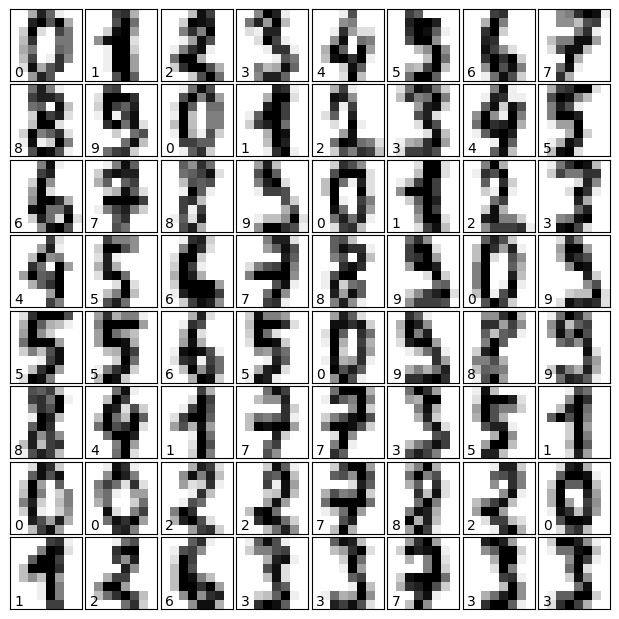

In [28]:
import matplotlib.pyplot as plt
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot der Ziffern: 
# jedes Bild besteht aus 8x8 Pixel.
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

### Übungen

#### Aufgabe 1

sklearn enthält einen „Wein-Datensatz“.

* Suchen und laden Sie diesen Datensatz
* Können Sie eine Beschreibung finden?
* Wie heißen die Klassen und die Features?
* Wo sind die Daten und die Daten und die Labels?

#### Aufgabe 2

Erzeugen Sie einen Punktwolke-Plot mit den Features `ash` und `color_intensity` des Wine-Datensatzes.

#### Aufgabe 3
Erzeugen Sie eine Scatter-Matrix für das Wine-Datenset

#### Aufgabe 4
Finden und laden Sie den Olivetti-Datensatz der Photos mit Gesichtern enthält und stellen Sie die Gesichter dar.

#### Lösungen
[Lösungen zu Aufgaben 1 bis 4](https://www.python-kurs.eu/datensaetze_in_sklearn.php)